![CF](imgs/netflixCBF.png)

# Content Based Filtering 

## Intro
The Content-Based Recommender relies on the similarity of the items being recommended. The basic idea is that if you like an item, then you will also like a “similar” item. It generally works well when it’s easy to determine the context/properties of each item.

A content based recommender works with data that the user provides, either explicitly movie ratings for the MovieLens dataset. Based on that data, a user profile is generated, which is then used to make suggestions to the user. As the user provides more inputs or takes actions on the recommendations, the engine becomes more and more accurate.

## Bulding Model
We are going to build a Content-Based Recommendation Engine that computes similarity between movies based on movie genres. It will suggest movies that are most similar to a particular movie based on its title and genre.

In [1]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

## Data Loading and Exploring

In [2]:
moviesDF=pd.read_csv("ml-1m/movies.dat",sep='::',engine="python",header=None)
moviesDF.columns=["movieId","title","genres"]

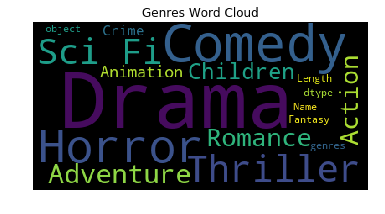

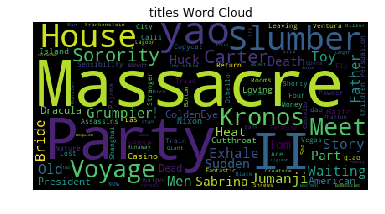

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movieId    3883 non-null int64
title      3883 non-null object
genres     3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None


In [3]:
def exploreDataset():
    # plot genres as wordcloud
    text = str(moviesDF['genres'])
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud,shape=(400,400))
    plt.axis("off")
    plt.title("Genres Word Cloud")
    plt.show()
    
    # plot titles as wordcloud
    text = str(moviesDF['title'])
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud,shape=(400,400))
    plt.axis("off")
    plt.title("titles Word Cloud")
    plt.show()
    
    print(moviesDF.info())
exploreDataset()

In [4]:
def trainModel():
    return findSimilarities(buildMoviesVectorizer())

### TF-IDF
We will user TfidfVectorizer function from scikit-learn, which transforms text to feature vectors that can be used as input to estimator.

In [5]:
def buildMoviesVectorizer():
    vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0.0005,stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(moviesDF['title']+" "+moviesDF['genres'])
    print("vectorizer is created")
    return tfidf_matrix

### cosine similarity
We will be using the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two movies. Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give me the Cosine Similarity Score. Therefore, we will use `sklearn’s linear_kernel` instead of `cosine_similarities` since it is much faster.


In [6]:
def findSimilarities(tfidf_matrix):
    print("calculating similarities")
    cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
    itemsSimilars=[]
    for idx, row in moviesDF.iterrows():
        similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
        similar_items = [(cosine_similarities[idx][i], moviesDF['movieId'][i]) for i in similar_indices]
        itemsSimilars.append(similar_items)
    return itemsSimilars

## Sorting and preapring results

Create new dataframe for final result and skip item which input and return sorted items based on similarity

In [7]:
def getSimilarMovies(itemID,topItemsNum):
    
    recommendedMoviesDF=pd.DataFrame(columns=['movieId','title','genres','similarity'])
    topSim=[]
    for item in itemsSimilars:
        if(item[0][1]==itemID):
            topSim=item[1:topItemsNum+1]
            print(moviesDF[moviesDF.movieId==itemID].title.values[0])
            for item in topSim:
                m=moviesDF[moviesDF.movieId==item[1]]
                recommendedMoviesDF=recommendedMoviesDF.append({'movieId':m.movieId.values[0],
                                                                'title':m.title.values[0],
                                                                'genres':m.genres.values[0],
                                                                'similarity':item[0]},ignore_index=True)
                
    return recommendedMoviesDF
    

In [8]:
itemsSimilars=trainModel()

vectorizer is created
calculating similarities


In [10]:
getSimilarMovies(1,20)

Toy Story (1995)


,movieId,title,genres,similarity
0,3114,Toy Story 2 (1999),Animation|Children's|Comedy,0.668357
1,13,Balto (1995),Animation|Children's,0.564193
2,2274,Lilian's Story (1995),Drama,0.484748
3,239,"Goofy Movie, A (1995)",Animation|Children's|Comedy|Romance,0.459689
4,244,Gumby: The Movie (1995),Animation|Children's,0.419633
5,48,Pocahontas (1995),Animation|Children's|Musical|Romance,0.410815
6,295,"Pyromaniac's Love Story, A (1995)",Comedy|Romance,0.361606
7,3611,Saludos Amigos (1943),Animation|Children's|Comedy,0.310997
8,888,Land Before Time III: The Time of the Great Gi...,Animation|Children's,0.309906
9,3400,We're Back! A Dinosaur's Story (1993),Animation|Children's,0.309872
